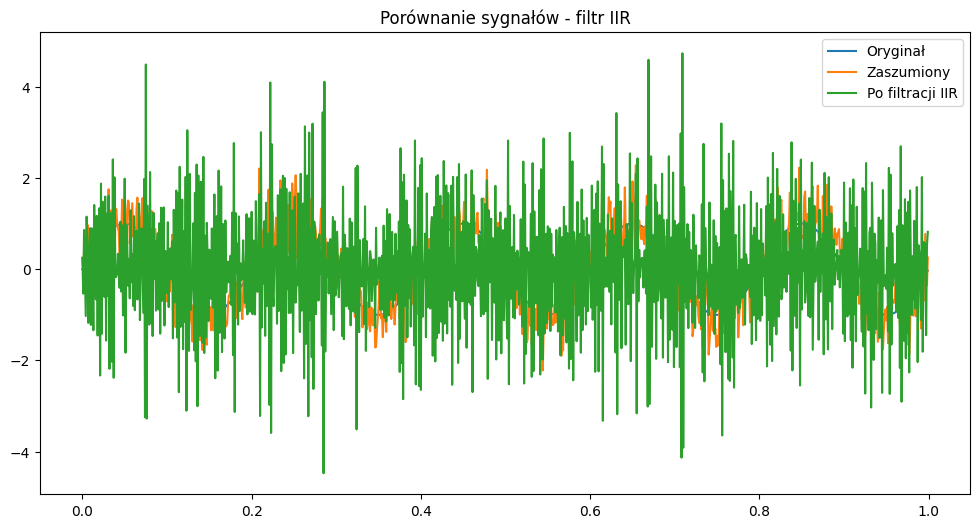

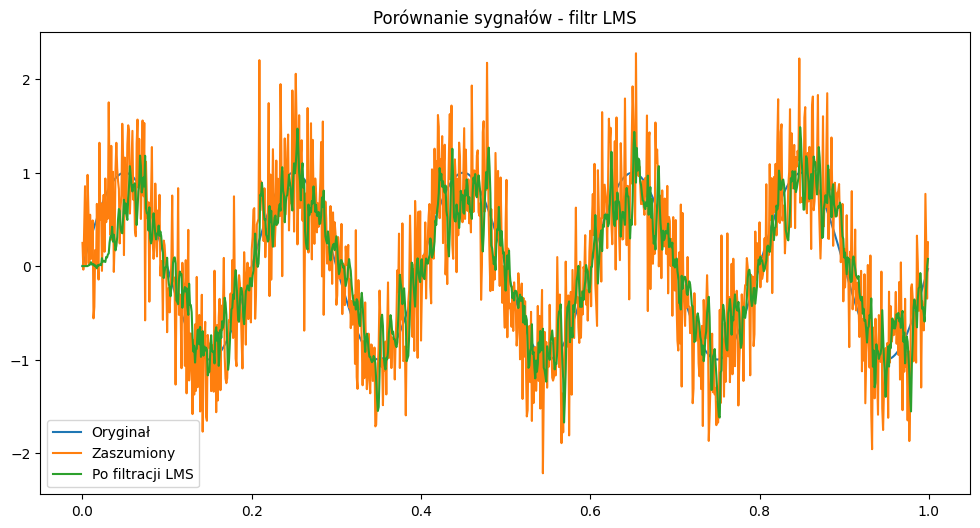

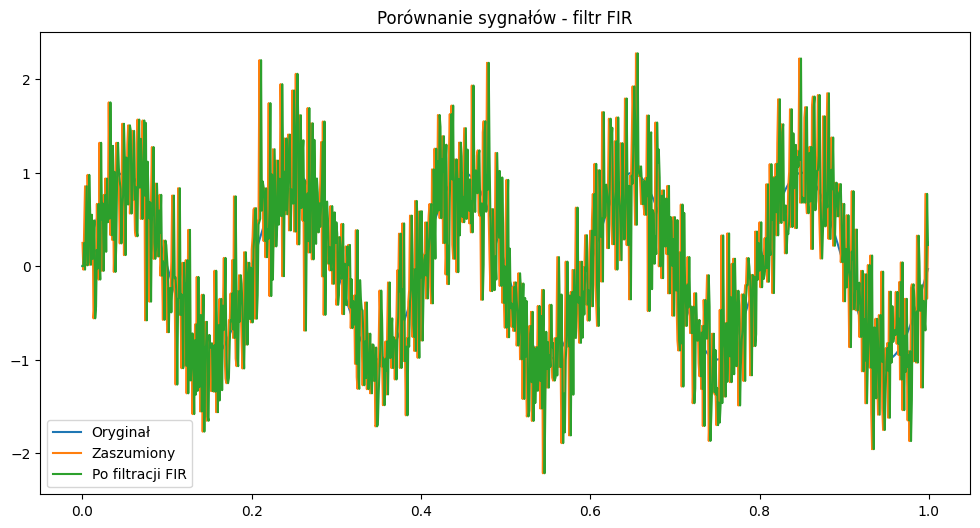

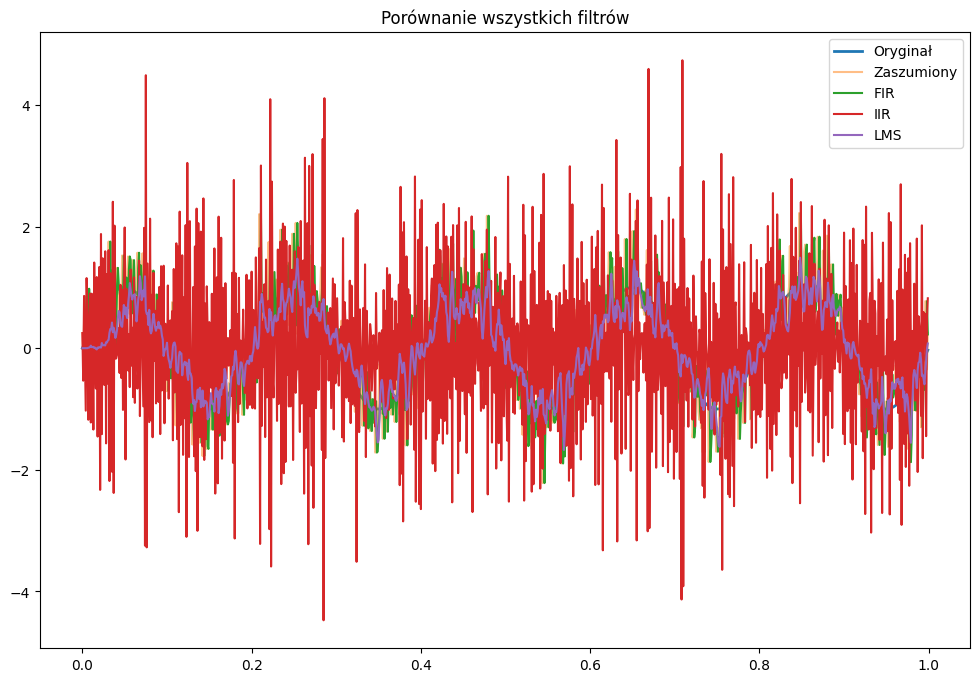

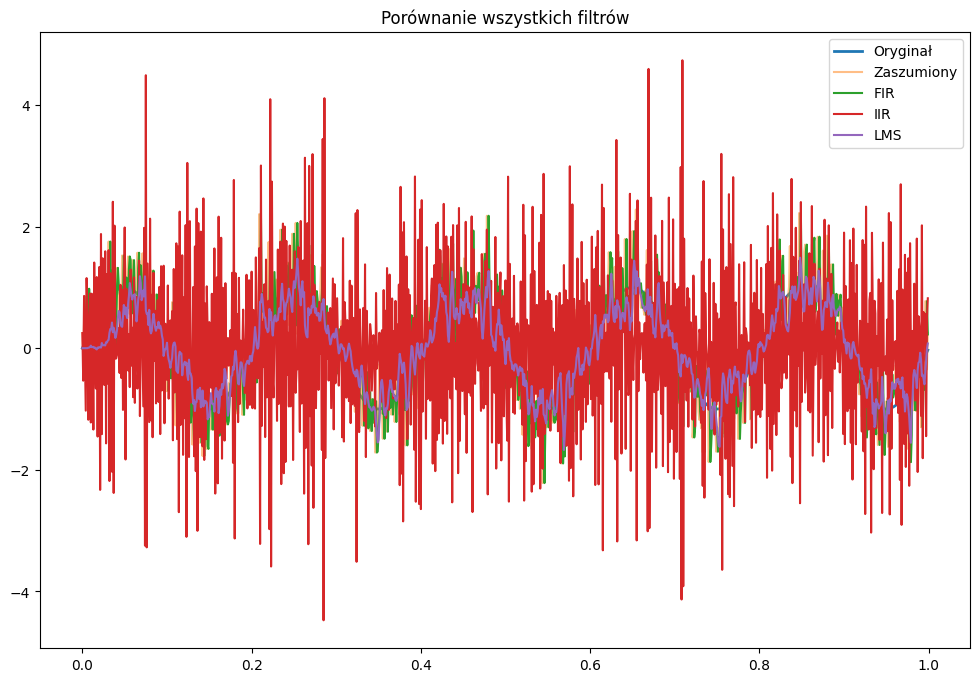

MSE FIR: 0.2407
MSE IIR: 2.2953
MSE LMS: 0.0759


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parametry sygnału
fs = 1000  # częstotliwość próbkowania [Hz]
T = 1.0    # czas trwania sygnału [s]
f = 5      # częstotliwość sygnału [Hz]
n = int(fs * T)  # liczba próbek
t = np.linspace(0, T, n, endpoint=False)

# Generowanie sygnału sinusoidalnego
x = np.sin(2 * np.pi * f * t)

# Dodanie szumu
np.random.seed(42)
noise = 0.5 * np.random.randn(n)
x_noisy = x + noise


# Współczynniki filtru FIR
b_fir = np.array([0, 0, 1])
a_fir = np.array([1])

# Filtracja sygnału
x_fir = signal.lfilter(b_fir, a_fir, x_noisy)

####
# Współczynniki filtru IIR
b_iir = np.array([1, -1.5, 0.7])
a_iir = np.array([1, 0.5, 0.1])

# Filtracja sygnału
x_iir = signal.lfilter(b_iir, a_iir, x_noisy)

# Wykresy
plt.figure(figsize=(12, 6))
plt.plot(t, x, label='Oryginał')
plt.plot(t, x_noisy, label='Zaszumiony')
plt.plot(t, x_iir, label='Po filtracji IIR')
plt.title('Porównanie sygnałów - filtr IIR')
plt.legend()
plt.show()
###
def lms_filter(x, mu=0.01, M=4):
    n = len(x)
    w = np.zeros(M)  # współczynniki filtru
    y = np.zeros(n)  # wyjście filtru
    e = np.zeros(n)  # błąd
    
    for k in range(M, n):
        x_k = x[k-M:k][::-1]  # ostatnie M próbek w odwrotnej kolejności
        y[k] = np.dot(w, x_k)
        e[k] = x[k] - y[k]    # x[k] zawiera oryginalny sygnał + szum
        w = w + 2 * mu * e[k] * x_k
    
    return y, e

# Filtracja adaptacyjna
x_lms, e_lms = lms_filter(x_noisy, mu=0.01, M=4)

# Wykresy
plt.figure(figsize=(12, 6))
plt.plot(t, x, label='Oryginał')
plt.plot(t, x_noisy, label='Zaszumiony')
plt.plot(t, x_lms, label='Po filtracji LMS')
plt.title('Porównanie sygnałów - filtr LMS')
plt.legend()
plt.show()
# Wykresy
plt.figure(figsize=(12, 6))
plt.plot(t, x, label='Oryginał')
plt.plot(t, x_noisy, label='Zaszumiony')
plt.plot(t, x_fir, label='Po filtracji FIR')
plt.title('Porównanie sygnałów - filtr FIR')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(t, x, label='Oryginał', linewidth=2)
plt.plot(t, x_noisy, label='Zaszumiony', alpha=0.5)
plt.plot(t, x_fir, label='FIR')
plt.plot(t, x_iir, label='IIR')
plt.plot(t, x_lms, label='LMS')
plt.title('Porównanie wszystkich filtrów')
plt.legend()
plt.show()
###
plt.figure(figsize=(12, 8))
plt.plot(t, x, label='Oryginał', linewidth=2)
plt.plot(t, x_noisy, label='Zaszumiony', alpha=0.5)
plt.plot(t, x_fir, label='FIR')
plt.plot(t, x_iir, label='IIR')
plt.plot(t, x_lms, label='LMS')
plt.title('Porównanie wszystkich filtrów')
plt.legend()
plt.show()

mse_fir = np.mean((x - x_fir)**2)
mse_iir = np.mean((x - x_iir)**2)
mse_lms = np.mean((x - x_lms)**2)

print(f"MSE FIR: {mse_fir:.4f}")
print(f"MSE IIR: {mse_iir:.4f}")
print(f"MSE LMS: {mse_lms:.4f}")